## Data Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
!pip install pydotplus
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install folium
import folium
import webbrowser
from folium import plugins
from sklearn import preprocessing
!wget -O DataCollision.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
data = pd.read_csv("DataCollision.csv")
data.head(5)

     |████████████████████████████████| 286kB 8.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
     |████████████████████████████████| 102kB 8.5MB/s ta 0:00:011
--2020-10-10 17:12:25--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘DataCollision.csv’

100%[======================================>] 73,917,638  35.7MB/s   in 2.0s   

2020-10-10 17:12:28 (35.7 MB/s) - ‘DataCollision.csv’ saved [73917638/73917638]



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
severity_code = data['SEVERITYCODE'].values
severity_code

array([2, 1, 1, ..., 2, 2, 1])

In [3]:
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

data ["SEVERITYCODE"] = severity_code

In [ ]:
data.head()


In [4]:
stats= data.describe(include="all")

In [5]:
stats_important=stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
stats_important.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
stats_important=stats_important.transpose()
stats_important

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,count
INATTENTIONIND,29805
UNDERINFL,189789
WEATHER,189592
ROADCOND,189661
LIGHTCOND,189503
SPEEDING,9333
SEVERITYCODE,194673


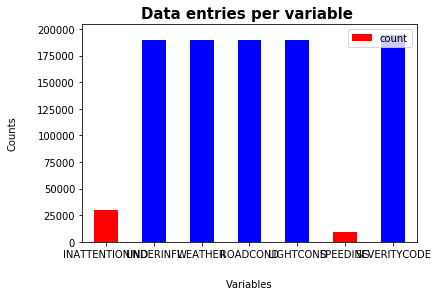

In [6]:
color=['red','blue','blue','blue','blue','red','blue']
stats_important.plot(kind='bar',alpha=1,color=[color])
plt.title('Data entries per variable ', fontsize=15, fontweight='bold')
plt.xlabel("Variables",fontsize=10,labelpad=20)
plt.ylabel("Counts",fontsize=10,labelpad=20)
plt.xticks(rotation=0)
plt.show()

In [7]:
data["UNDERINFL"].replace("N", 0, inplace=True)
data["UNDERINFL"].replace("Y", 1, inplace=True)
data["LIGHTCOND"].replace("Daylight", 0, inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
data["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
data["LIGHTCOND"].replace("Dusk", 1, inplace=True)
data["LIGHTCOND"].replace("Dawn", 1, inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
data["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
data["LIGHTCOND"].replace("Other","Unknown", inplace=True)
data["WEATHER"].replace("Clear", 0, inplace=True)
data["WEATHER"].replace("Raining", 3, inplace=True)
data["WEATHER"].replace("Overcast", 1, inplace=True)
data["WEATHER"].replace("Other", "Unknown", inplace=True)
data["WEATHER"].replace("Snowing", 3, inplace=True)
data["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
data["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
data["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
data["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
data["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
data["ROADCOND"].replace("Dry", 0, inplace=True)
data["ROADCOND"].replace("Wet", 2, inplace=True)
data["ROADCOND"].replace("Ice", 2, inplace=True)
data["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
data["ROADCOND"].replace("Other", "Unknown", inplace=True)
data["ROADCOND"].replace("Standing Water", 2, inplace=True)
data["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
data["ROADCOND"].replace("Oil", 2, inplace=True)
data["SPEEDING"].replace("Y", 1, inplace=True)
data["SPEEDING"].replace(np.nan, 0, inplace=True)
data["INATTENTIONIND"].replace("Y", 1, inplace=True)
data["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,2,0,NaN,NaN,0.0,10,Entering at angle,0,0,N
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,2,1,NaN,6354039.0,0.0,11,From same direction - both going straight - bo...,0,0,N
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0,0,NaN,4323031.0,0.0,32,One parked--one moving,0,0,N
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0,0,NaN,NaN,0.0,23,From same direction - all others,0,0,N
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,2,0,NaN,4028032.0,0.0,10,Entering at angle,0,0,N


In [8]:
dataset=data[["X","Y","INCKEY", "UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SEVERITYCODE", "INATTENTIONIND", "SPEEDING"]]
dataset

,X,Y,INCKEY,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,INATTENTIONIND,SPEEDING
0,-122.323148,47.703140,1307,0,1,2,0,1,0.0,0.0
1,-122.347294,47.647172,52200,0,3,2,1,0,0.0,0.0
2,-122.334540,47.607871,26700,0,1,0,0,0,0.0,0.0
3,-122.334803,47.604803,1144,0,0,0,0,0,0.0,0.0
4,-122.306426,47.545739,17700,0,3,2,0,1,0.0,0.0
5,-122.387598,47.690575,320840,0,0,0,0,0,0.0,0.0
6,-122.338485,47.618534,83300,0,3,2,0,0,0.0,0.0
7,-122.320780,47.614076,330897,0,0,0,0,1,0.0,0.0
8,-122.335930,47.611904,63400,0,0,0,0,0,0.0,0.0
9,-122.384700,47.528475,58600,0,0,0,0,1,0.0,0.0


In [9]:
dataset.dropna(axis=0,how='any',inplace=True)
dataset

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,X,Y,INCKEY,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,INATTENTIONIND,SPEEDING
0,-122.323148,47.703140,1307,0,1,2,0,1,0.0,0.0
1,-122.347294,47.647172,52200,0,3,2,1,0,0.0,0.0
2,-122.334540,47.607871,26700,0,1,0,0,0,0.0,0.0
3,-122.334803,47.604803,1144,0,0,0,0,0,0.0,0.0
4,-122.306426,47.545739,17700,0,3,2,0,1,0.0,0.0
5,-122.387598,47.690575,320840,0,0,0,0,0,0.0,0.0
6,-122.338485,47.618534,83300,0,3,2,0,0,0.0,0.0
7,-122.320780,47.614076,330897,0,0,0,0,1,0.0,0.0
8,-122.335930,47.611904,63400,0,0,0,0,0,0.0,0.0
9,-122.384700,47.528475,58600,0,0,0,0,1,0.0,0.0


In [10]:
dataset_plot= dataset.loc[(dataset[["X","Y","INCKEY", "UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SEVERITYCODE","INATTENTIONIND", "SPEEDING"]] != "Unknown").all(axis=1)]

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [11]:
dataset_plot.dtypes

X                 float64
Y                 float64
INCKEY              int64
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SEVERITYCODE        int64
INATTENTIONIND    float64
SPEEDING          float64
dtype: object

In [12]:
dataset_plot["UNDERINFL"]=dataset_plot["UNDERINFL"].astype(int)
dataset_plot["WEATHER"]=dataset_plot["WEATHER"].astype(int)
dataset_plot["ROADCOND"]=dataset_plot["ROADCOND"].astype(int)
dataset_plot["LIGHTCOND"]=dataset_plot["LIGHTCOND"].astype(int)
dataset_plot["INATTENTIONIND"]=dataset_plot["INATTENTIONIND"].astype(int)
dataset_plot["SPEEDING"]=dataset_plot["SPEEDING"].astype(int)
dataset_plot.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

X                 float64
Y                 float64
INCKEY              int64
UNDERINFL           int64
WEATHER             int64
ROADCOND            int64
LIGHTCOND           int64
SEVERITYCODE        int64
INATTENTIONIND      int64
SPEEDING            int64
dtype: object

In [13]:
X=dataset_plot[["UNDERINFL","ROADCOND","WEATHER","LIGHTCOND", "INATTENTIONIND", "SPEEDING"]].values
y=dataset_plot[["SEVERITYCODE"]].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116351, 6) (116351, 1)
Test set: (49866, 6) (49866, 1)


In [15]:
dataset_plot.head()

,X,Y,INCKEY,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,INATTENTIONIND,SPEEDING
0,-122.323148,47.703140,1307,0,1,2,0,1,0,0
1,-122.347294,47.647172,52200,0,3,2,1,0,0,0
2,-122.334540,47.607871,26700,0,1,0,0,0,0,0
3,-122.334803,47.604803,1144,0,0,0,0,0,0,0
4,-122.306426,47.545739,17700,0,3,2,0,1,0,0


In [17]:
!pip install kmeans-smote
from imblearn.over_sampling import SMOTE
DS = SMOTE (random_state=0)
DS_data_X, DS_data_y= DS.fit_sample(X_train, y_train.ravel())
print("done!")

     |████████████████████████████████| 174kB 8.9MB/s eta 0:00:01
done!


In [18]:
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DecisionTree.fit(DS_data_X,DS_data_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
yhatDecisionTree = DecisionTree.predict(X_test)

In [20]:
print('Acc. score for DecisionTree = ', accuracy_score(yhatDecisionTree, y_test))

Acc. score for DecisionTree =  0.577387398227249


In [21]:
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDecisionTree.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          22625  10849  33474
1          10225   6167  16392
All        32850  17016  49866


In [22]:
print(classification_report(yhatDecisionTree,y_test))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     32850
           1       0.38      0.36      0.37     17016

   micro avg       0.58      0.58      0.58     49866
   macro avg       0.53      0.53      0.53     49866
weighted avg       0.57      0.58      0.58     49866



In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhatDecisionTree, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 6167 10225]
 [10849 22625]]


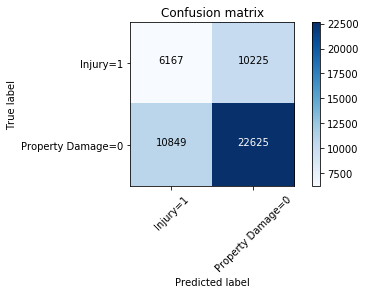

In [24]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [25]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(DS_data_X,DS_data_y)

In [26]:
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [27]:
print(log_loss(y_test, yhat_prob))

0.6901653279938647


In [28]:
print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

Accuracy 0.5759034211687322
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     33474
           1       0.36      0.37      0.37     16392

   micro avg       0.58      0.58      0.58     49866
   macro avg       0.52      0.52      0.52     49866
weighted avg       0.58      0.58      0.58     49866



Confusion matrix, without normalization
[[ 6141 10251]
 [10897 22577]]


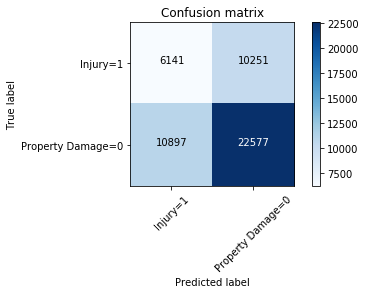

In [29]:
cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
     
    KNN = KNeighborsClassifier(n_neighbors = n).fit(DS_data_X,DS_data_y.ravel())
    yhat=KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighboors (K)')
plt.tight_layout()
plt.show()


In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

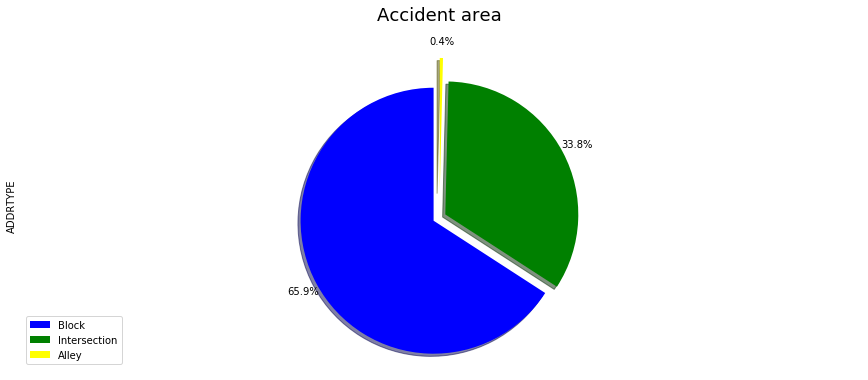

In [30]:
explode_list = [0.05, 0.05, 0.2]
color_list=['blue','green','yellow']
addtype=data['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)
plt.title('Accident area', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [ ]:
limit = 100005
red_df= dataset_plot.iloc [0:limit:5, 0:]
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

incidents = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label, in zip(red_df.Y, red_df.X, red_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=str(label),
    ).add_to(incidents)

seattle_map.add_child(incidents)

seattle_map